# Ćwiczenia treningowe

Importujemy niezbędne elementy biblioteki Qiskit.

In [50]:
from qiskit import QuantumCircuit, BasicAer, execute
from qiskit.visualization import plot_histogram

import numpy as np

Tworzymy obwód kwantowy, składający się z dwóch kubitów i dwóch bitów klasycznych, te ostatnie nizebędne są po to aby móc rejestrować wyniki pomiarów.

In [27]:
qc = QuantumCircuit(2,2)

Obwód możemy narysować.

In [28]:
qc.draw()

q_0: 
     
q_1: 
     
c: 2/

Jest on na razie pusty bo nie dodaliśmy żadnych bramek. Dodajmy bramkę NOT ($X$) na pierwszym kubicie i narysujmy obwód.

In [29]:
qc.x(0)
qc.draw()

┌───┐
q_0: ┤ X ├
     └───┘
q_1: ─────
          
c: 2/═════

Ten sposób rysowania obwodów jest mało atrakcyjny wizualnie, dodając odpowiednią opcję możemy wygenerować ładniejszy obrazek.

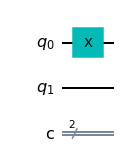

In [30]:
qc.draw(output='mpl')

Dodajmy teraz elementy dokonujące pomiarów na obu kubitach.

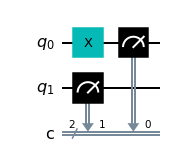

In [31]:
qc.measure([1,0],[1,0])
qc.draw(output='mpl')

Mając gotowy obwód możemy go uruchomić np. na symulatorze komputera kwantowego. Njapierw wybieramy odpowiedni symulator.

In [32]:
backend = BasicAer.get_backend('qasm_simulator')

Następnie wykonujemy obwód za pomocą execute, jako argumenty podając obwód do wykonania (qc), urządzenie, w naszym przypadku symulator (backend) oraz liczbę wykonań obwodu (shots).

In [33]:
counts = execute(qc, backend, shots=1024).result().get_counts()

Zmienna counts zawiera otrzymane z pomiarów wyniki wraz z liczbą zliczeń.

In [34]:
print(counts)

{'01': 1024}


W naszym przypadku wszystkie 1024 uruchomienia dały w wyniku pomiaru '01'.

Bramka $X$ zmienia $|0\rangle$ na $|1\rangle$ oraz $|1\rangle$ na $|0\rangle$. Postać macierzowa tej bramki to:
$$X=\left(\begin{array}{cc}
0&1\\
1&0\\
\end{array}\right)$$
jako, że postać wektorowa stanów bazowych to:
$$|0\rangle=\left(\begin{array}{c}
1\\
0\\
\end{array}
\right)$$

$$|1\rangle=\left(\begin{array}{c}
0\\
1\\
\end{array}
\right)$$

Stan początkowy obwodu domyślnie jest inicjowany jako $|00\rangle$ następnie w wyniku dodania bramki $X$ na pierwszym kubicie stan zmienił się na $|10\rangle$. Zatem każdy pomiar musi dac wynik '10', z tym, że Qiskit przyjmuje konwencje, że wynik zczytuje od ostaniego kubitu, stąd wynik '01'.

Wynik możemy przedstawić na histogramie, pokazującym prawdopodobieństeo otrzymania wyniku, u nas jest ono oczywiście równe 1 dla wyniku '01' i 0 dla pozostałych.

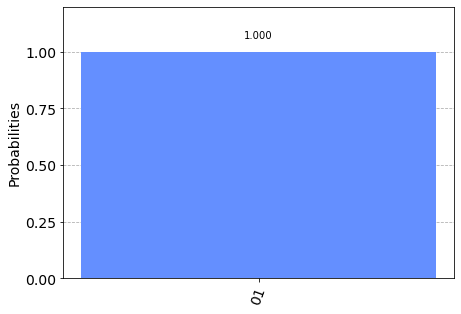

In [35]:
plot_histogram(counts)

Teraz stwórzmy nowy obwód, w którym na pierwszym kubicie zamiast bramki $X$ będzie bramka Hadamarda $H$.

$$H=\frac{1}{\sqrt{2}}\left(\begin{array}{cc}
1&1\\
1&-1\\
\end{array}\right)$$


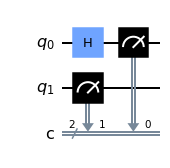

In [36]:
qc2 = QuantumCircuit(2,2)

qc2.h(0)
qc2.measure([0,1],[0,1])

qc2.draw(output='mpl')

Wykonajmy symulację.

{'00': 498, '01': 526}


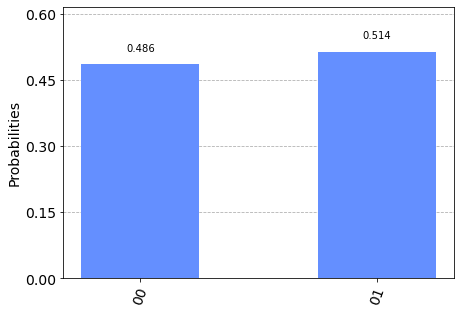

In [37]:
backend = BasicAer.get_backend('qasm_simulator')
counts = execute(qc2, backend, shots=1024).result().get_counts()
print(counts)
plot_histogram(counts)

Dostaliśmy mniej więcej 50% szans na wynik '00' i 50% na  wynik '01'. Bramka Hadamarda działając na stan $|0\rangle$ tworzy stan będący supepozycją $H|0\rangle=\frac{1}{\sqrt{2}}\left(|0\rangle+|1\rangle\right)$.

$$H|0\rangle=\frac{1}{\sqrt{2}}\left(\begin{array}{cc}
1&1\\
1&-1\\
\end{array}\right)\left(\begin{array}{c}
1\\
0\\
\end{array}
\right)=\frac{1}{\sqrt{2}}\left(\begin{array}{c}
1\\
1\\
\end{array}
\right)=\frac{1}{\sqrt{2}}\left(|0\rangle+|1\rangle\right)$$



Zatem nasz obwód starując ze stanu $|00\rangle$ przeszedł w stan $\frac{1}{\sqrt{2}}\left(|00\rangle+|10\rangle\right)$. Stąd w wyniku pomiaru mamy prawdopodobieństwo $|\frac{1}{\sqrt{2}}|^2=\frac{1}{2}$ wyniku '00' i '01'.

Wyniki otrzymane z symulacji nie sa dokładne ze względu na błedy statystyczne. Rzucając idelaną monetą też nie zawsze dostaniemy tyle samo orłów i reszek. Zwiększając liczbę ewaluacji obwodu możemy uzyskać lepsze wyniki.

{'01': 4033, '00': 4163}


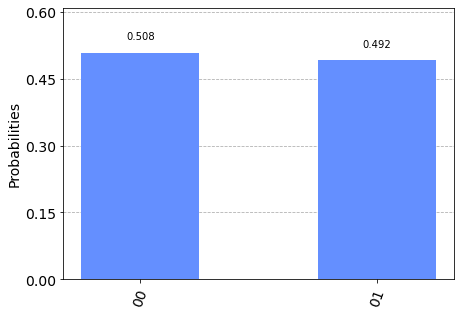

In [43]:
backend = BasicAer.get_backend('qasm_simulator')
counts = execute(qc2, backend, shots=8196).result().get_counts()
print(counts)
plot_histogram(counts)

Gdybyśmy wykonali ten obwód na prawdziwym komputerze kwantowym błędy byłyby jeszcze wieksze ze względu na szum obecny w takim sprzęcie.

Zauważmy, że drugi kubit daje zawsze wynik '0' i nie jest on w żaden sposób skorelowany z pierwszym. Wynika to z tego, że te dwa kubity są w stanie separowalnym (tzn. nie splątanym), czyli ich stan kwantowy można zapsiać jako iloczyn stanu jednego i drugiego: $\frac{1}{\sqrt{2}}\left(|00\rangle+|10\rangle\right)=\frac{1}{\sqrt{2}}\left(|0\rangle+|1\rangle\right)|0\rangle$. Wygenerujmy więc stan nieseparowalny (splątany). Zrobimy to za pomocą bramki Hadamarda oraz bramki CNOT, ta druga jest bramką dwukubitową, tj. działa na dwa kubity i dzięki temu może wprowadzić między nimi splątanie.

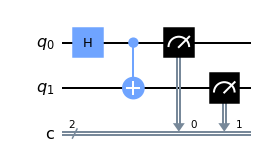

In [44]:
qc3 = QuantumCircuit(2,2)

qc3.h(0)
qc3.cx(0,1)
qc3.measure([0,1],[0,1])

qc3.draw(output='mpl')

Bramka ta wykonuje operację $X$ na drugim kubicie pod warunkiem, ze na pierwszym jest stan $|1\rangle$. Tzn.
$$CNOT|00\rangle=|00\rangle$$
$$CNOT|01\rangle=|01\rangle$$
$$CNOT|10\rangle=|11\rangle$$
$$CNOT|11\rangle=|10\rangle$$

Zatem nasz obwód, startuje ze stanu $|00\rangle$, bo zadziałaniu $H$ dostajemy $\frac{1}{\sqrt{2}}\left(|00\rangle+|10\rangle\right)$ a po zadziałaniu CNOT dostajemy $\frac{1}{\sqrt{2}}\left(|00\rangle+|11\rangle\right)$. Zauważmy, że jest to stan splątany tzn. nie da się zapisać jako iloczyn stanu jednego kubitu i drugiego. Wobec tego teraz z prawdopodobieństwem $\frac{1}{2}$ dostaniemy wynik '00' i z takim samym prawdopodobieństwem wynik '11', ale zawsze jeśli na pierwszy kubicie będzie wynik '0' to na drugim również '0' a jeśli na pierwszym '1' to na drugim również '1'. Mamy zatem całkowitą korelację wyników pomiędzy tymi kubitami, jest to właśnie efekt splątania. Sprawdźmy czy wszysko działa w symulacji.

{'11': 519, '00': 505}


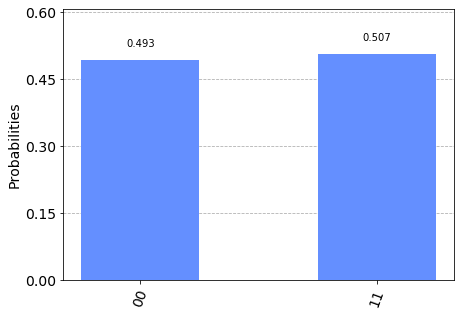

In [16]:
backend = BasicAer.get_backend('qasm_simulator')
counts = execute(qc3, backend, shots=1024).result().get_counts()
print(counts)
plot_histogram(counts)

Warto jeszcze zwócić uwagę na kwestię pomiaru w mechanice kwantowej. W wyniku pomiaru stan kolapsuje na jeden z wektorów własnych obserwabli, którą mierzymy (jeden z wektórów bazy w której mierzymy), w przypadku komputerów kwantowych pomiar jest zawsze w tzw. bazie $Z$, tzn. w tej bazie w której są zapisane wszystkie stany, czyli $|0\rangle$ i $|1\rangle$ dla pojedyńczego kubitu.

Rozpatrzmy przykład stanu:

$$\frac{1}{2}|00\rangle+\frac{\sqrt{3}}{2}|10\rangle$$

mamy tu dwa możliwe wyniki pomiaru:
1. dostajemy w wyniku pomiaru '00' i stan kolapsuje $$\frac{1}{2}|00\rangle+\frac{\sqrt{3}}{2}|10\rangle\longrightarrow|00\rangle$$ taka sytuacja zajdzie z prawdopodobieństwem $|\frac{1}{2}|^2=\frac{1}{4}$
1. dostajemy w wyniku pomiaru '10' i stan kolapsuje $$\frac{1}{2}|00\rangle+\frac{\sqrt{3}}{2}|10\rangle\longrightarrow|10\rangle$$ taka sytuacja zajdzie z prawdopodobieństwem $|\frac{\sqrt{3}}{2}|^2=\frac{3}{4}$

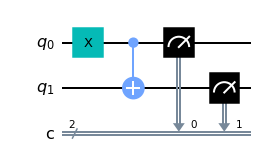

In [47]:
qc4 = QuantumCircuit(2,2)

qc4.x(0)
qc4.cx(0,1)
qc4.measure([0,1],[0,1])

qc4.draw(output='mpl')

{'11': 1024}


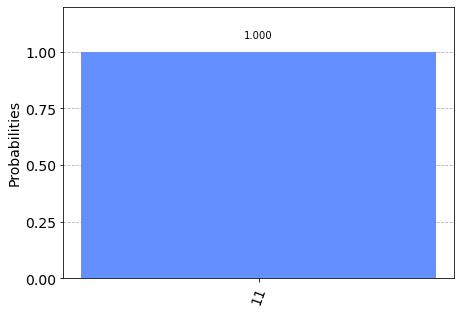

In [48]:
backend = BasicAer.get_backend('qasm_simulator')
counts = execute(qc4, backend, shots=1024).result().get_counts()
print(counts)
plot_histogram(counts)

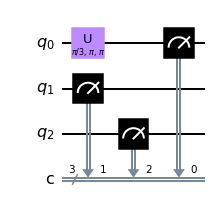

In [52]:
qc5 = QuantumCircuit(3,3)

qc5.u(np.pi/3,np.pi,np.pi,0)#theta=pi/3,phi=pi,lambda=pi
qc5.measure([0,1,2],[0,1,2])

qc5.draw(output='mpl')

{'000': 781, '001': 243}


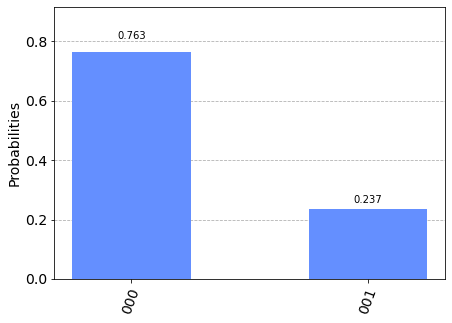

In [54]:
backend = BasicAer.get_backend('qasm_simulator')
counts = execute(qc5, backend, shots=1024).result().get_counts()
print(counts)
plot_histogram(counts)

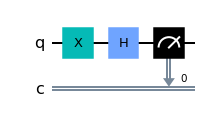

In [56]:
qc6 = QuantumCircuit(1,1)
qc6.x(0)
qc6.h(0)
qc6.measure([0],[0])


qc6.draw(output='mpl')

{'0': 548, '1': 476}


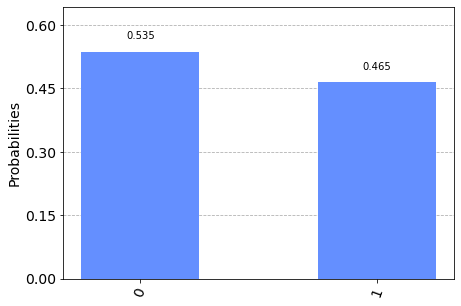

In [57]:
backend = BasicAer.get_backend('qasm_simulator')
counts = execute(qc6, backend, shots=1024).result().get_counts()
print(counts)
plot_histogram(counts)
